In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

(50, 4, 4)


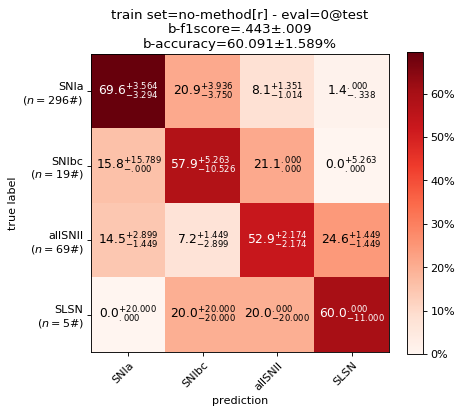

(50, 4, 4)


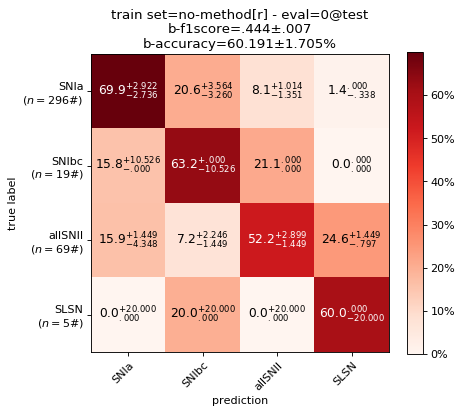

(50, 4, 4)


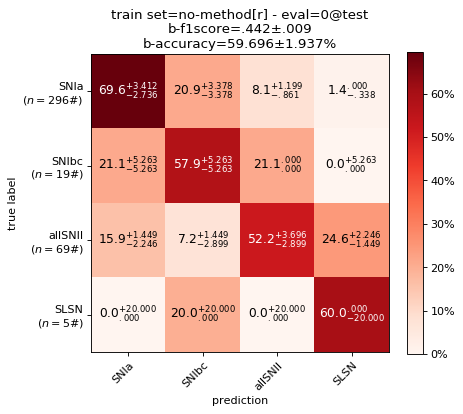

(50, 4, 4)


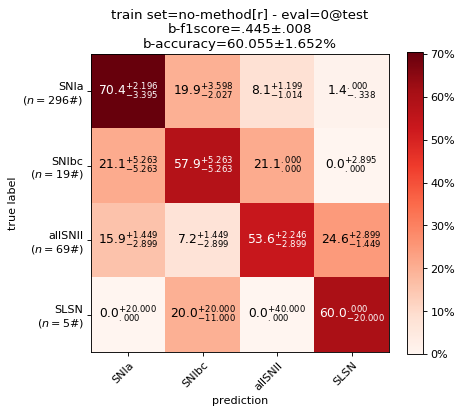

(50, 4, 4)


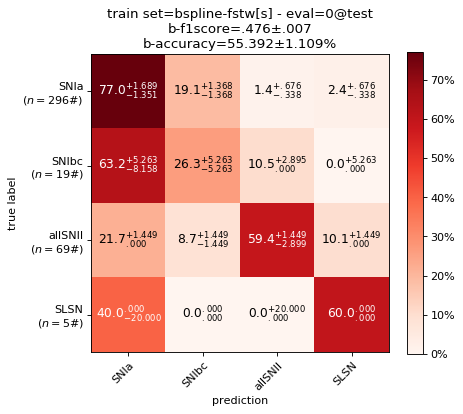

(50, 4, 4)


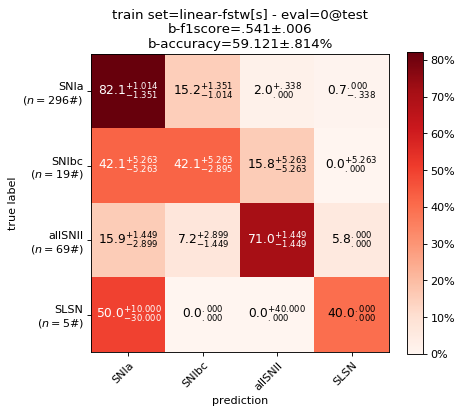

(50, 4, 4)


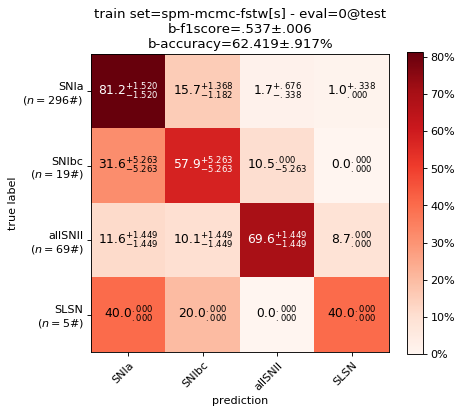

(50, 4, 4)


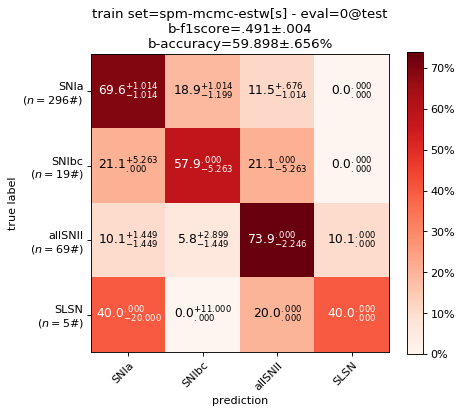

(50, 4, 4)


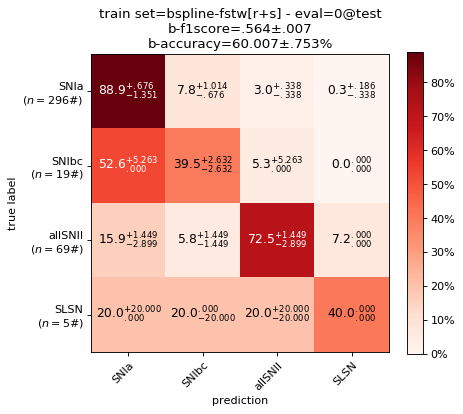

(50, 4, 4)


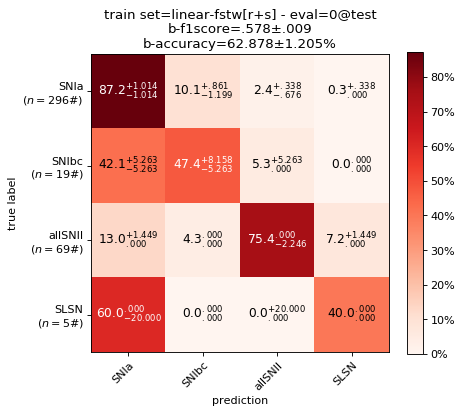

(50, 4, 4)


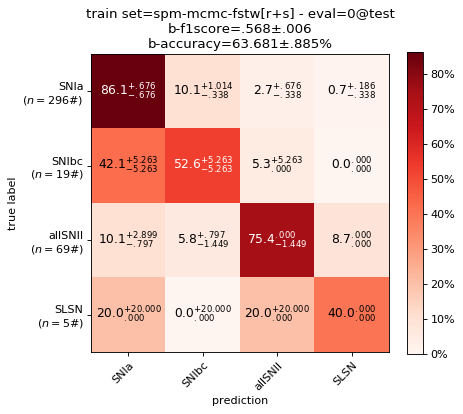

(50, 4, 4)


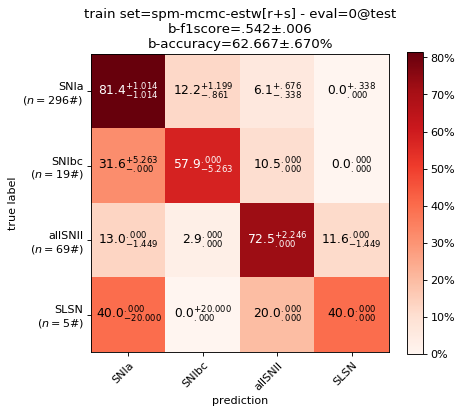

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import search_for_filedirs, gather_files_by_id
from flamingchoripan.cuteplots.cm_plots import plot_custom_confusion_matrix
import matplotlib.pyplot as plt
from flamingchoripan.datascience.statistics import XError

methods = [
    'bspline-fstw',
    'linear-fstw',
    #'spm-mle-fstw',
    'spm-mcmc-fstw',
    #'spm-mle-estw',
    'spm-mcmc-estw',
]
#methods = ['spm-mcmc-estw']
eval_lcset_name = 'test' # val test
kf = 0

for train_config in ['r', 's', 'r+s']:
    for method in methods:
        rootdir = f'../save/exp=rf_eval°train_config={train_config}/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method={method}/{kf}@{eval_lcset_name}'
        results = gather_files_by_id(rootdir)
        class_names = results[0]['lcset_info']['class_names']
        cms = np.concatenate([r['cm'][None] for r in results], axis=0)
        f1score_xe = XError([r['metrics_dict']['b-f1score'] for r in results])
        accuracy_xe = XError([r['metrics_dict']['b-accuracy'] for r in results])
        print(cms.shape)

        ### plot cm
        _title = 'no-method[r]' if train_config=='r' else f'{method}[{train_config}]'
        title = ''
        title += f'train set={_title} - eval={kf}@{eval_lcset_name}'+'\n'
        title += f'b-f1score={f1score_xe}'+'\n'
        title += f'b-accuracy={accuracy_xe}%'+'\n'
        cm_kwargs = {
            'title':title[:-1],
            'figsize':(6,5),
            'new_order_classes':['SNIa', 'SNIbc', 'allSNII', 'SLSN'],
        }
        fig, ax = plot_custom_confusion_matrix(cms, class_names, **cm_kwargs)
        plt.show()

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.statistics import XError
from flamingchoripan.dataframes import DFBuilder
from flamingchoripan.latex.latex_tables import LatexTable

metrics = [
    'b-accuracy',
    'b-f1score',
    'b-gmean',
    #'b-dpower',
    'b-xentropy',
]
info_df = DFBuilder()
for metric in metrics:
    for train_config in ['r', 's', 'r+s']:
        d = {}
        for method in methods:
            rootdir = f'../save/exp=rf_eval°train_config={train_config}/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method={method}/{kf}@{eval_lcset_name}'
            results = gather_files_by_id(rootdir)
            metric_xe = XError([r['metrics_dict'][metric] for r in results])
            d[method] = metric_xe

        info_df.append(f'metric={metric} [{train_config}]', d)
        
latex_kwargs = {
    'caption':f'eval={kf}@{eval_lcset_name}',
    'label':'?',
    #'bold_criteriums':'max',
    'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    'hline_k':2,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)
print('% \multicolumn{3}{c|}{}')
info_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{eval=0@test}
\label{?}\vspace{.1cm}
\begin{tabular}{l|ccc|c}
\hline
metric & bspline-fstw & linear-fstw & spm-mcmc-fstw & spm-mcmc-estw \srule\\\hline\hline
b-accuracy [r] & 60.091$\pm$1.589 & 60.191$\pm$1.705 & 59.696$\pm$1.937 & 60.055$\pm$1.652  \srule\\
b-accuracy [s] & 55.392$\pm$1.109 & 59.121$\pm$.814 & 62.419$\pm$.917 & 59.898$\pm$.656  \srule\\
b-accuracy [r+s] & 60.007$\pm$.753 & 62.878$\pm$1.205 & 63.681$\pm$.885 & 62.667$\pm$.670  \srule\\
\hline
b-f1score [r] & .443$\pm$.009 & .444$\pm$.007 & .442$\pm$.009 & .445$\pm$.008  \srule\\
b-f1score [s] & .476$\pm$.007 & .541$\pm$.006 & .537$\pm$.006 & .491$\pm$.004  \srule\\
b-f1score [r+s] & .564$\pm$.007 & .578$\pm$.009 & .568$\pm$.006 & .542$\pm$.006  \srule\

bspline-fstw   linear-fstw spm-mcmc-fstw  \
metric=b-accuracy [r]    60.091±1.589  60.191±1.705  59.696±1.937   
metric=b-accuracy [s]    55.392±1.109   59.121±.814   62.419±.917   
metric=b-accuracy [r+s]   60.007±.753  62.878±1.205   63.681±.885   
metric=b-f1score [r]        .443±.009     .444±.007     .442±.009   
metric=b-f1score [s]        .476±.007     .541±.006     .537±.006   
metric=b-f1score [r+s]      .564±.007     .578±.009     .568±.006   
metric=b-gmean [r]          .725±.011     .725±.012     .722±.013   
metric=b-gmean [s]          .677±.011     .717±.006     .745±.007   
metric=b-gmean [r+s]        .722±.006     .744±.009     .754±.007   
metric=b-xentropy [r]      1.117±.009    1.119±.010    1.119±.009   
metric=b-xentropy [s]      1.312±.098    1.135±.073    1.100±.025   
metric=b-xentropy [r+s]    1.120±.020    1.189±.086    1.155±.025   

                        spm-mcmc-estw  
metric=b-accuracy [r]    60.055±1.652  
metric=b-accuracy [s]     59.898±.656  
metric=b-accuracy [r+s]   62.667±.670  
metric=b-f1score [r]        .445±.008  
metric=b-f1score [s]        .491±.004  
metric=b-f1score [r+s]      .542±.006  
metric=b-gmean [r]          .725±.012  
metric=b-gmean [s]          .723±.005  
metric=b-gmean [r+s]        .744±.005  
metric=b-xentropy [r]      1.122±.010  
metric=b-xentropy [s]      1.113±.017  
metric=b-xentropy [r+s]    1.128±.018

In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.statistics import XError
from flamingchoripan.dataframes import DFBuilder
from flamingchoripan.latex.latex_tables import LatexTable

info_df = DFBuilder()
train_config = 'r+s'
rank_n = 15
for k in range(0, rank_n):
    d = {}
    for method in methods:
        rootdir = f'../save/exp=rf_eval°train_config={train_config}/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method={method}/{kf}@{eval_lcset_name}'
        results = gather_files_by_id(rootdir)
        r = results[0]
        rank = r['rank']
        #print(rank)
        feature_name, feature_p,_ = rank[k]
        feature_name = feature_name.replace('_', '-')
        d[f'{method}[{train_config}]'] = f'{feature_name} ({feature_p*100:.3f}%)'

    info_df.append(f'feature-rank={k+1}', d)

latex_kwargs = {
    'caption':f'eval={kf}@{eval_lcset_name}',
    'label':'?',
    #'bold_criteriums':'max',
    'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    'hline_k':2,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)
info_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{eval=0@test}
\label{?}\vspace{.1cm}
\begin{tabular}{l|ccc|c}
\hline
feature-rank & bspline-fstw[r+s] & linear-fstw[r+s] & spm-mcmc-fstw[r+s] & spm-mcmc-estw[r+s] \srule\\\hline\hline
1 & SPM-tau-rise-r (16.363\%) & SPM-tau-rise-r (18.911\%) & SPM-tau-rise-r (21.960\%) & SPM-tau-rise-r (24.804\%)  \srule\\
2 & LinearTrend-g (13.008\%) & LinearTrend-g (12.526\%) & LinearTrend-g (11.804\%) & LinearTrend-g (10.754\%)  \srule\\
3 & LinearTrend-r (6.767\%) & SPM-gamma-r (7.369\%) & SPM-tau-fall-r (7.431\%) & SPM-gamma-r (9.108\%)  \srule\\
\hline
4 & SPM-gamma-g (6.655\%) & SPM-tau-fall-r (6.787\%) & SPM-gamma-r (6.695\%) & SPM-tau-rise-g (7.214\%)  \srule\\
5 & SPM-tau-rise-g (5.591\%) & SPM-beta-r (6.474\%) & SPM-beta-r (

bspline-fstw[r+s]          linear-fstw[r+s]  \
feature-rank=1   SPM-tau-rise-r (16.363%)  SPM-tau-rise-r (18.911%)   
feature-rank=2    LinearTrend-g (13.008%)   LinearTrend-g (12.526%)   
feature-rank=3     LinearTrend-r (6.767%)      SPM-gamma-r (7.369%)   
feature-rank=4       SPM-gamma-g (6.655%)   SPM-tau-fall-r (6.787%)   
feature-rank=5    SPM-tau-rise-g (5.591%)       SPM-beta-r (6.474%)   
feature-rank=6       SPM-gamma-r (5.238%)   SPM-tau-rise-g (5.782%)   
feature-rank=7          SPM-t0-g (5.182%)         SPM-t0-g (5.410%)   
feature-rank=8    SPM-tau-fall-g (5.174%)   SPM-tau-fall-g (4.877%)   
feature-rank=9    SPM-tau-fall-r (4.652%)      SPM-gamma-g (4.603%)   
feature-rank=10       SPM-beta-r (4.533%)         SPM-t0-r (4.040%)   
feature-rank=11        IAR-phi-g (3.932%)    LinearTrend-r (4.033%)   
feature-rank=12       SPM-beta-g (3.899%)       SPM-beta-g (3.794%)   
feature-rank=13        IAR-phi-r (3.739%)        IAR-phi-r (3.102%)   
feature-rank=14       MHPS-low-g (3.683%)        IAR-phi-g (2.851%)   
feature-rank=15         SPM-t0-r (3.566%)       MHPS-low-r (2.805%)   

                       spm-mcmc-fstw[r+s]        spm-mcmc-estw[r+s]  
feature-rank=1   SPM-tau-rise-r (21.960%)  SPM-tau-rise-r (24.804%)  
feature-rank=2    LinearTrend-g (11.804%)   LinearTrend-g (10.754%)  
feature-rank=3    SPM-tau-fall-r (7.431%)      SPM-gamma-r (9.108%)  
feature-rank=4       SPM-gamma-r (6.695%)   SPM-tau-rise-g (7.214%)  
feature-rank=5        SPM-beta-r (6.353%)   SPM-tau-fall-r (6.590%)  
feature-rank=6    SPM-tau-fall-g (4.983%)       SPM-beta-r (6.460%)  
feature-rank=7    SPM-tau-rise-g (4.926%)   SPM-tau-fall-g (4.451%)  
feature-rank=8          SPM-t0-g (4.620%)        IAR-phi-r (3.426%)  
feature-rank=9     LinearTrend-r (4.267%)    LinearTrend-r (3.286%)  
feature-rank=10      SPM-gamma-g (4.201%)       MHPS-low-r (3.112%)  
feature-rank=11         SPM-t0-r (4.000%)       SPM-beta-g (3.105%)  
feature-rank=12       SPM-beta-g (3.447%)      SPM-gamma-g (3.056%)  
feature-rank=13        IAR-phi-r (3.091%)         SPM-t0-r (2.941%)  
feature-rank=14        IAR-phi-g (2.954%)         SPM-t0-g (2.704%)  
feature-rank=15       MHPS-low-r (2.574%)       MHPS-low-g (2.627%)